In [ ]:
from IPython.core.display import HTML
with open ("../style.css", "r") as file:
    css = file.read()
HTML(css)

# 2D Random Walk

In [1]:
import random as rnd
import math
import numpy as np
rnd.seed(42)

The function `walk` takes one parameter:
* `n` is the number of steps that are taken.

The function performs a two dimensional [random walk](https://en.wikipedia.org/wiki/Random_walk) of length `n` in a square grid.  At every step, the randowm walker chooses a direction from the set
$$ \{ \texttt{north},  \texttt{east},  \texttt{south},  \texttt{west} \} $$
and walks a distance of length $1$ in the choosen direction. 

The function returns two `numpy` arrays `X` and `Y` that are both of length `n + 1`.
For all $i \in \{0, 1,\cdots, n\}$ we have that `X[i]` is the *x-coordinate* of
the position of the random walker after the $i^\textrm{th}$ step, while `Y[i]` is the *y-coordinate*.


In [2]:
def walk(n):
    X = np.zeros(n + 1, dtype=int)   # initialize X to contain n+1 zeros
    Y = np.zeros(n + 1, dtype=int)   # initialize Y to contain n+1 zeros

    # Random walk of length n
    for i in range(1, n + 1):
        direction = rnd.randint(0, 3)
        if direction == 0:
            X[i] = X[i - 1] + 1
            Y[i] = Y[i - 1]
        elif direction == 1:
            X[i] = X[i - 1]
            Y[i] = Y[i - 1] + 1
        elif direction == 2:
            X[i] = X[i - 1] - 1
            Y[i] = Y[i - 1]
        else:
            X[i] = X[i - 1]
            Y[i] = Y[i - 1] - 1

    return X, Y  

In [3]:
X, Y = walk(10)
X, Y

(array([0, 1, 2, 1, 1, 1, 1, 2, 3, 3, 4]),
 array([0, 0, 0, 0, 1, 2, 3, 3, 3, 2, 2]))

In [4]:
import matplotlib.pyplot as plt
import seaborn           as sns

The function `show_walk(n)` creates a random walk of `n` steps and displays it.

In [5]:
def show_walk(n):
    X, Y = walk(n) 
    plt.figure(figsize=(12, 12))
    sns.set(style='darkgrid')
    size = 2 * math.trunc(math.sqrt(n))
    if n <= 1_001:
        step_size = 1
    elif n <= 40_000:
        step_size = 10
    else:
        step_size = 20
    plt.xticks(ticks=range(-size, size, step_size))
    plt.yticks(ticks=range(-size, size, step_size))
    plt.plot(X, Y)
    plt.title(f'Random walk of length {n}')

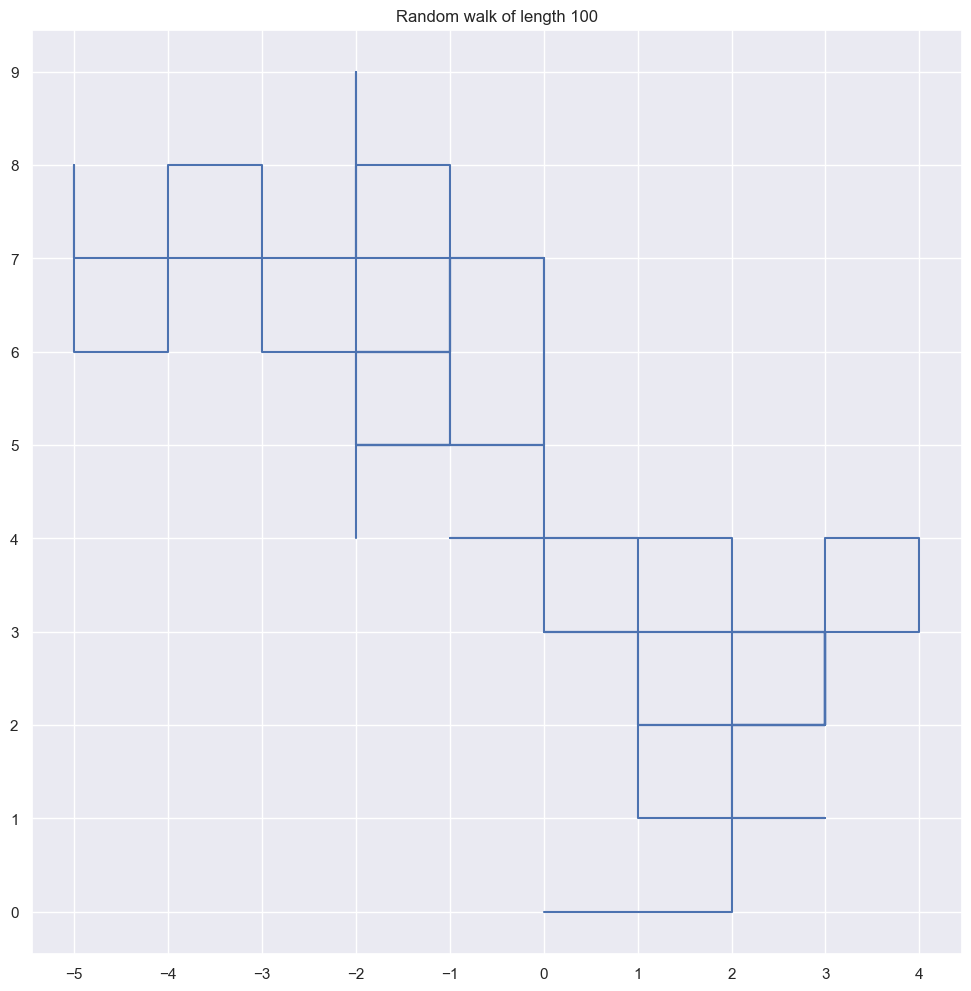

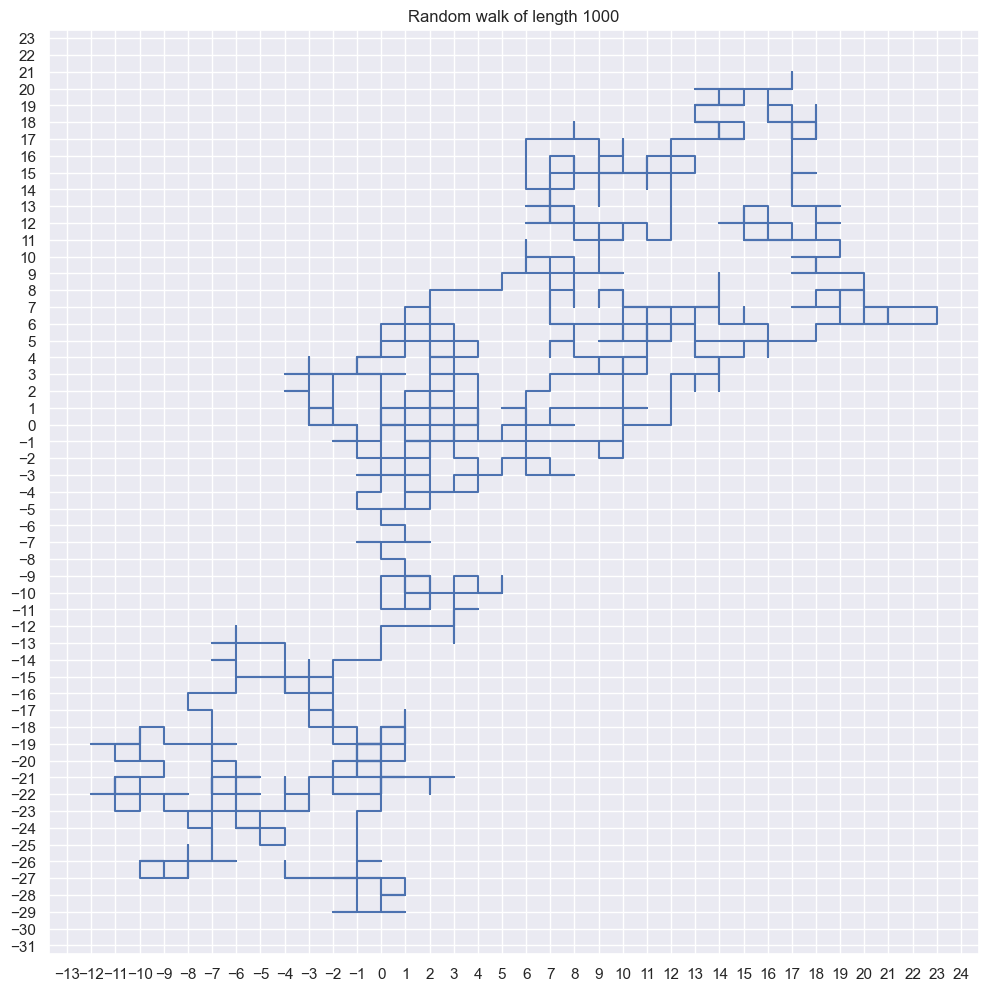

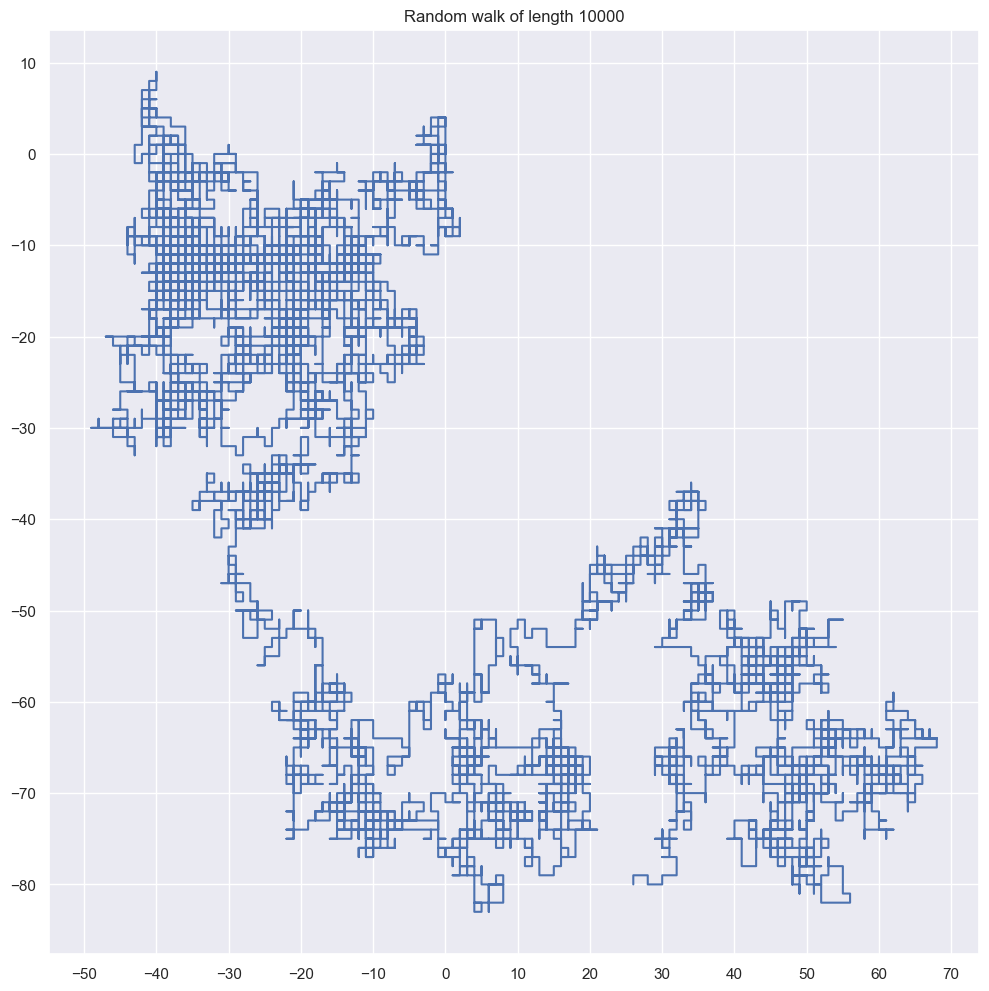

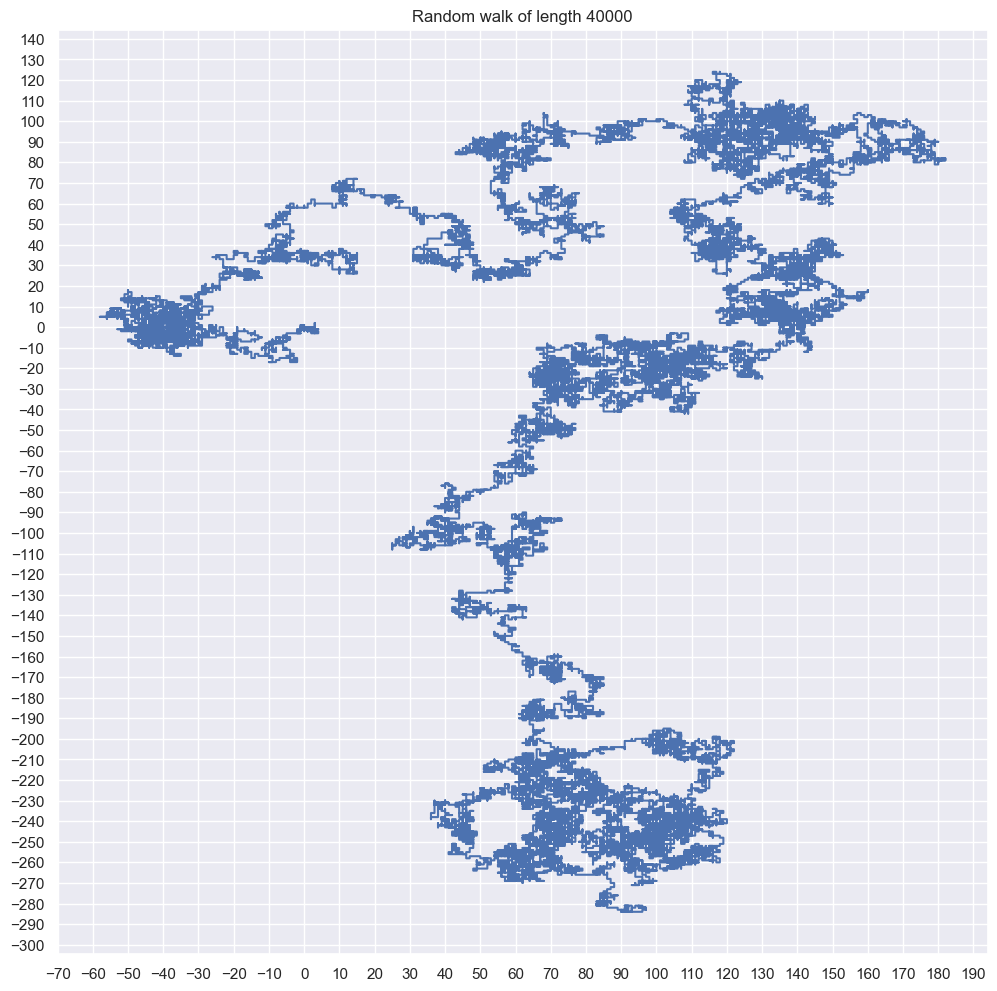

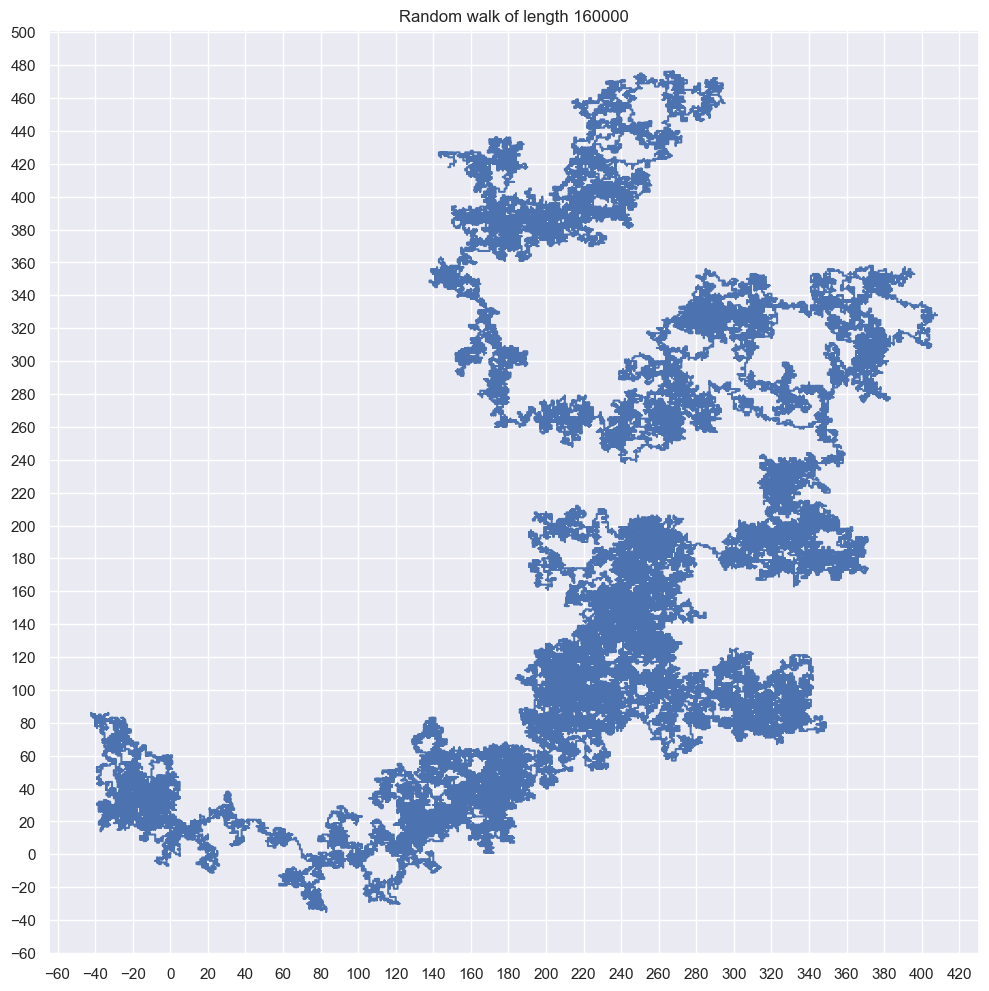

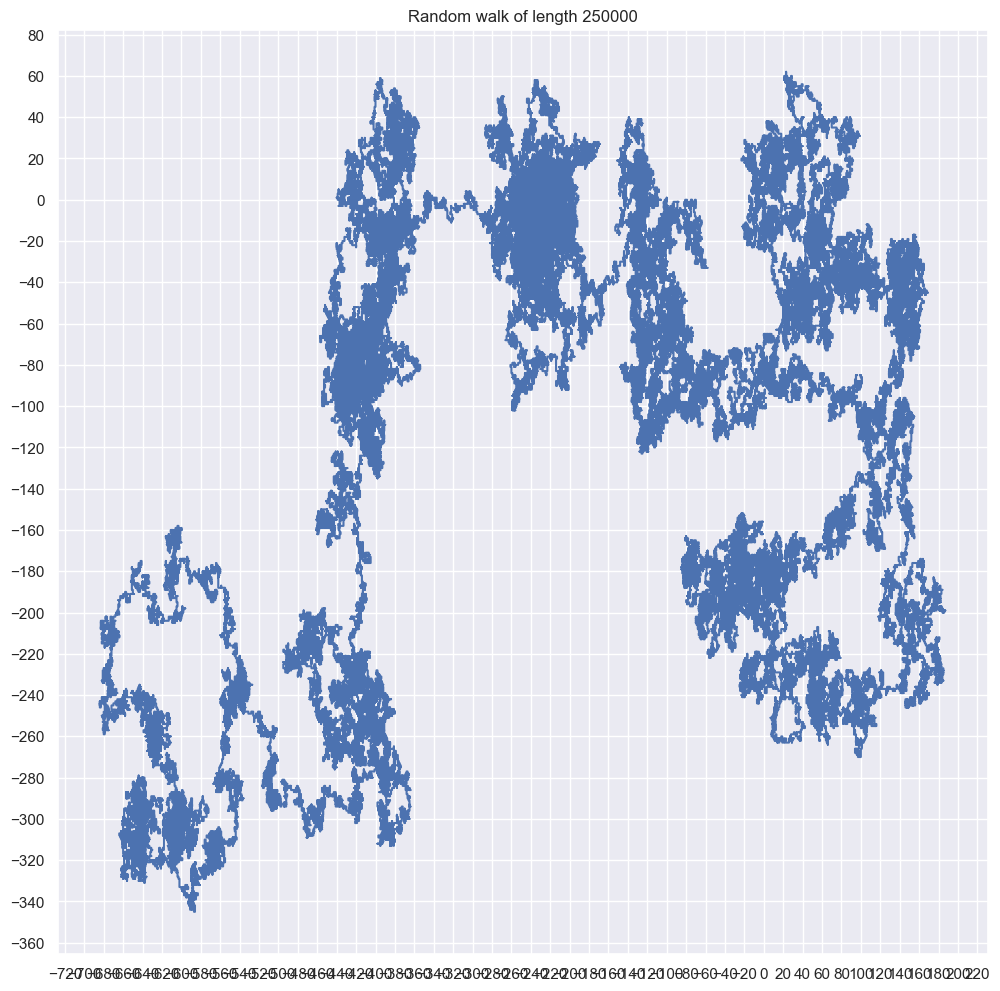

In [6]:
for n in [100, 1_000, 10_000, 40_000, 160_000, 250_000]:
    show_walk(n)

The function `average_distance(trials, n)` performs `trials` random walks of length `n`.  It returns a  `numpy` array of length `n + 1` containing the *average* distances of the walker from the origin after `i` steps where $i \in \{0,1,\cdots, n\}$.

In [7]:
def average_distance(trials, n):
    ad = np.zeros(n + 1, dtype=float)
    for i in range(trials):
        X, Y = walk(n)
        for j in range(n + 1):
            ad[j] += math.sqrt(X[j]**2 + Y[j]**2)
    return ad / trials

For testing, define `trials` as `10_000`.  To get accurate results, we should set the number of trials to a million. 

In [ ]:
%%time
trials = 1_000_000
Distance = average_distance(trials, 100)
Distance

In [ ]:
def plot_distance(Distance):
    X = np.array(range(101))
    Y = Distance
    plt.figure(figsize=(12, 10))
    sns.set(style='darkgrid')
    plt.xticks(ticks=range(0, 101, 10))
    plt.scatter(X, Y, c='b', s=4) 
    plt.xlabel('number of steps')
    plt.ylabel('distance from origin')
    plt.title('Average distance of a random walker from the origin')

In [ ]:
plot_distance(Distance)

In [ ]:
def plot_logarithmic_distance(Distance):
    X = np.log(np.array(range(1, 101)))
    Y = np.log(Distance[1:])
    plt.figure(figsize=(12, 10))
    sns.set(style='darkgrid')
    plt.scatter(X, Y, c='b', s=4) 
    plt.xlabel('logarithm of number of steps')
    plt.ylabel('logarithm of distance from origin')
    plt.title('Average distance of a random walker from the origin, log scale')

In [ ]:
plot_logarithmic_distance(Distance)

In [ ]:
import sklearn.linear_model as lm

The function `linear_regression` takes one input:
* `Distance` is a numpy array.  `Distance[i]` is the average distance
  of the random walker after the $i^{th}$ step.
  
Our assumption is that $i$ and `Distance[i]` are related by a power law
of the form
$$ \texttt{Distance}[i] = \alpha \cdot i^\beta. $$
The function estimates $\alpha$ and $\beta$ via an appropriate variation of linear regression and returns the pair $(\alpha, \beta)$.

In [ ]:
def linear_regression(Distance):
    # Reshape distance into a matrix with one column
    X = np.array(range(1, 101)).reshape(-1, 1)
    Y = Distance[1:].reshape(-1, 1)
    # Create a linear regression model
    model = lm.LinearRegression()
    # Fit the model
    model.fit(np.log(X), np.log(Y))
    # Extract 𝛼 and 𝛽
    𝛼 = math.exp(model.intercept_[0])
    𝛽 = model.coef_[0][0]
    return 𝛼, 𝛽 

In [ ]:
𝛼,𝛽 = linear_regression(Distance)

Finally, we can print the formula we have found.

In [ ]:
print(f'Distance[i] = {𝛼} * i^{𝛽}')